In [1]:
# os.environ["JAX_PLATFORMS"] = "cpu"

In [2]:
import jax
import numpy as np
from mrfx.experiments import time_complete_sampling, plot_benchmark
from mrfx.samplers import ChromaticGibbsSampler
from mrfx.models import Potts

key = jax.random.PRNGKey(0)

K = 2
beta = 1.0
potts_model = Potts(K, beta=beta, neigh_size=1)

Ks = np.arange(2, 8)
sizes = [(2**e, 2**e) for e in range(4, 10)]
reps = 10

key, subkey = jax.random.split(key, 2)
times, n_iterations, samples = time_complete_sampling(
    ChromaticGibbsSampler,
    Potts,
    subkey,
    Ks,
    sizes,
    reps,
    kwargs_sampler={
        "eps": 0.05,
        "max_iter": 10000,
        "color_update_type": "vmap_in_color",
    },
    kwargs_model={"beta": beta},
    exp_name="Gibbs_sampler_GPU",
)

/home/hugo/Documents/recherche/gum/code/mrfx_private/mrfx/experiments/_benchmark.py:166: UserWarning: A JAX array is being set as static! This can result in unexpected behavior and is usually a mistake to do.
  model = Model(k, **kwargs_model)


Rep ( / 10): Stopping Gibbs sampler, cause: Convergence criterion is reached
Stopping Gibbs sampler, cause: Convergence criterion is reached
1 Stopping Gibbs sampler, cause: Convergence criterion is reached
2 Stopping Gibbs sampler, cause: Convergence criterion is reached
3 Stopping Gibbs sampler, cause: Convergence criterion is reached
4 Stopping Gibbs sampler, cause: Convergence criterion is reached
5 Stopping Gibbs sampler, cause: Convergence criterion is reached
6 Stopping Gibbs sampler, cause: Convergence criterion is reached
7 Stopping Gibbs sampler, cause: Convergence criterion is reached
8 Stopping Gibbs sampler, cause: Convergence criterion is reached
9 Stopping Gibbs sampler, cause: Convergence criterion is reached
10 
k=2, lx=16, ly=16, compilation_time=3.443993091583252, runtime_mean=2.114115500450134, n_iter_mean=30.4
Rep ( / 10): Stopping Gibbs sampler, cause: Convergence criterion is reached
Stopping Gibbs sampler, cause: Convergence criterion is reached
1 Stopping Gibbs

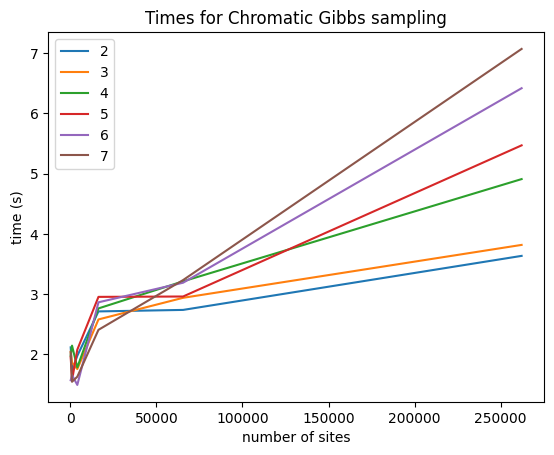

In [3]:
plot_benchmark(Ks, sizes, times, title="Times for Chromatic Gibbs sampling")